In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

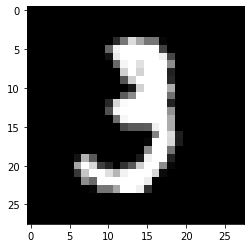

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[10], cmap='gray')

x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation='relu')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(784, activation='relu')(encoder_output)
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_input)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [11]:
opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder.compile(opt, loss='mse')

autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0275 - val_loss: 0.0117
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0110 - val_loss: 0.0108


In [20]:
example_idx = 1

example = encoder.predict([x_test[example_idx].reshape(-1, 28, 28, 1)])[0]
print(example.shape)
print(example)

(64,)
[1.4130499  1.1370696  3.5774803  0.82596785 2.3380468  0.96910954
 0.842566   1.4735967  1.0793858  0.50418615 3.2715073  1.1224242
 2.8078024  0.8911962  0.5019547  2.1382828  1.5476445  2.7751641
 0.19512668 2.750716   3.4027472  0.39854747 2.6034446  0.37197816
 1.3013682  1.987046   0.         0.7990119  1.428133   0.6430402
 3.0894299  0.81879157 1.9387411  2.116886   1.8016073  1.279221
 1.1315391  1.6144038  0.21579084 0.3358116  0.18088418 0.5832896
 3.192952   0.569888   2.0352213  1.1405282  0.3599253  1.5271454
 1.7831669  2.0450675  1.2897049  0.         1.3909461  1.3008974
 0.2096523  1.5085497  0.         0.33574992 1.4529297  1.7664881
 0.7410283  1.2763646  2.1263378  1.3562545 ]


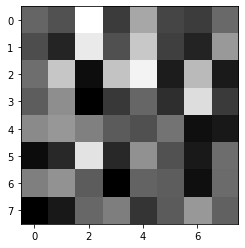

In [21]:
plt.imshow(example.reshape((8, 8)), cmap='gray')

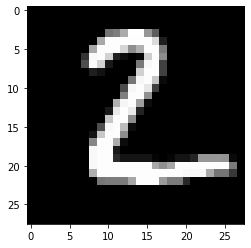

In [22]:
plt.imshow(x_test[example_idx], cmap='gray')

In [23]:
ae_out = autoencoder.predict([x_test[example_idx].reshape(-1, 28, 28, 1)])[0]

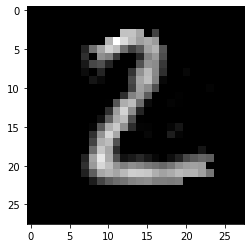

In [24]:
plt.imshow(ae_out, cmap='gray')

In [25]:
import random

def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance:
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

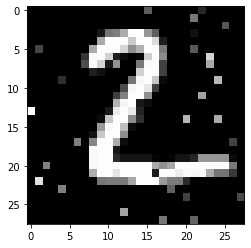

In [26]:
noisy = add_noise(x_test[example_idx])
plt.imshow(noisy, cmap='gray')

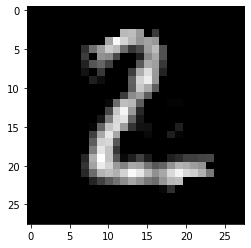

In [27]:
noisy_out = autoencoder.predict([noisy.reshape(-1, 28, 28, 1)])[0]

plt.imshow(noisy_out, cmap='gray')

In [28]:
def remove_values(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = 0  # changing this to be 0 
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

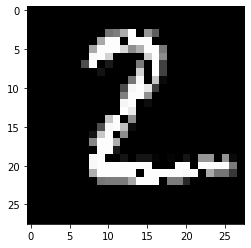

In [33]:
rnoisy = remove_values(x_test[example_idx], random_chance=20)

plt.imshow(rnoisy, cmap='gray')

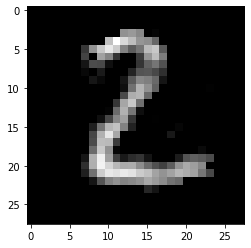

In [34]:
rnoisy_out = autoencoder.predict([rnoisy.reshape(-1, 28, 28, 1)])[0]

plt.imshow(rnoisy_out, cmap='gray')